 **Assignment: Movie Ratings & Revenue Analysis**

Step 1: Create a CSV – movies.csv:

In [ ]:
data = """MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000
"""

with open('movies.csv', 'w') as file:
    file.write(data)

**PART 1: Pandas Operations**

1. Load movies.csv into a Pandas DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv('movies.csv')
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


2. Convert ReleaseDate to datetime.

In [ ]:
converting = df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print(converting)

0   2010-07-16
1   2008-07-18
2   1997-12-19
3   2014-11-07
4   2019-10-04
5   2004-06-25
6   2019-04-26
Name: ReleaseDate, dtype: datetime64[ns]


3. Calculate Profit = Revenue - Budget .

In [ ]:
cal = df['Profit'] = df['Revenue'] - df['Budget']
print(cal)

0    6.655328e+08
1    8.195584e+08
2    1.987464e+09
3    5.124713e+08
4    1.019251e+09
5             NaN
6    2.441801e+09
dtype: float64


4. Add a column "Era" :
Before 2000 → Classic
2000-2010 → Mid
After 2010 → Modern

In [ ]:
def era_classifier(date):
    year = date.year
    if year < 2000:
        return "Classic"
    elif 2000 <= year <= 2010:
        return "Mid"
    else:
        return "Modern"
df["Era"] = df["ReleaseDate"].apply(era_classifier)
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


5. Handle nulls in Revenue by filling with average revenue.

In [ ]:
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


6. Sort by Rating descending.

In [ ]:
dec = df.sort_values(by='Rating', ascending=False)
print(dec)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   

      Budget        Profit      Era  
1  185000000  8.195584e+08      Mid  
0  160000000  6.655328e+08      Mid  
3  165000000  5.124713e+08   Modern  
6  356000000  2.441801e+09   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
2  200000000  1.987464e+09  Classic  


7. Group by Genre → average Rating & total Revenue.

In [ ]:
grouped = df.groupby('Genre').agg({
    'Rating': 'mean',
    'Revenue': 'sum'
})
print(grouped)

         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


8. Filter movies with Rating ≥ 8.5 and Profit > 500M.

In [ ]:
val = df[(df['Rating'] >= 8.5) & (df['Profit'] > 500000000)]
print(val)

   MovieID            Title   Genre ReleaseDate  Rating       Revenue  \
0        1        Inception  Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2  The Dark Knight  Action  2008-07-18     9.0  1.004558e+09   
3        4     Interstellar  Sci-Fi  2014-11-07     8.6  6.774713e+08   

      Budget       Profit     Era  
0  160000000  665532764.0     Mid  
1  185000000  819558444.0     Mid  
3  165000000  512471339.0  Modern  


9. Plot bar chart of Movie Title vs Profit.

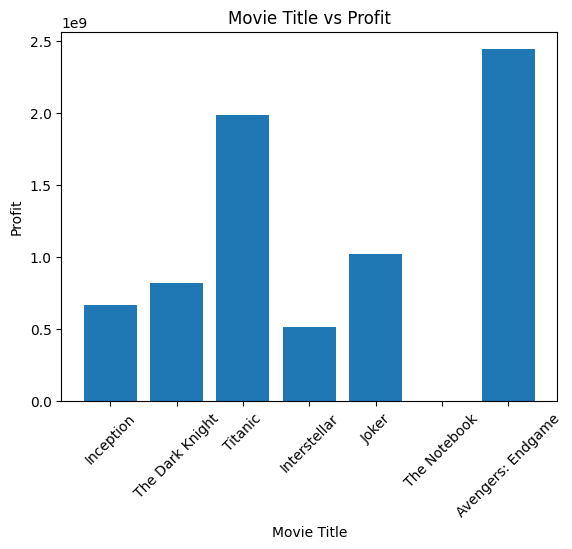

In [ ]:
from matplotlib import pyplot as plt

plt.bar(df['Title'], df['Profit'])
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.title('Movie Title vs Profit')
plt.xticks(rotation=45)
plt.show()

**PART 2: PySpark Operations**

1. Read the same CSV using PySpark.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MoviesAnalysis").getOrCreate()
spark

In [ ]:
df = spark.read.csv("movies.csv", header=True, inferSchema=True)
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+



2. Create Profit column ( Revenue - Budget ).

In [ ]:
from pyspark.sql.functions import col

df = df.withColumn("Profit", col("Revenue") - col("Budget"))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+



3. Filter where Genre == 'Sci-Fi' and Profit > 500000000 .

In [ ]:
filtered_df = df.filter((col("Genre") == "Sci-Fi") & (col("Profit") > 500000000))
filtered_df.show()

+-------+------------+------+-----------+------+---------+---------+---------+
|MovieID|       Title| Genre|ReleaseDate|Rating|  Revenue|   Budget|   Profit|
+-------+------------+------+-----------+------+---------+---------+---------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|825532764|160000000|665532764|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|677471339|165000000|512471339|
+-------+------------+------+-----------+------+---------+---------+---------+



4. Group by Genre → avg(Rating) , sum(Profit)

In [ ]:
group = df.groupBy("Genre").agg(
    {"Rating": "avg", "Profit": "sum"}
)
group.show()

+-------+-----------+-----------+
|  Genre|avg(Rating)|sum(Profit)|
+-------+-----------+-----------+
|Romance|       7.85| 1987463944|
|  Drama|        8.4| 1019251311|
| Action|        8.7| 3261359008|
| Sci-Fi|        8.7| 1178004103|
+-------+-----------+-----------+



5. Use when().otherwise() to classify Rating as:
=9 → Blockbuster
8–9 → Hit
below 8 → Average

In [ ]:
from pyspark.sql.functions import when

rate = df.withColumn("RatingCategory", when((col("Rating") >= 8) & (col("Rating") <= 9), "Hit").when(col("Rating") < 8, "Average").otherwise("Blockbuster"))
rate.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+--------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|RatingCategory|
+-------+-----------------+-------+-----------+------+----------+---------+----------+--------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|           Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|           Hit|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|       Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|           Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|           Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|       Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800

6. Drop the Budget column.

In [ ]:
df = df.drop("Budget")
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|
+-------+-----------------+-------+-----------+------+----------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|
+-------+-----------------+-------+-----------+------+----------+----------+



7. Fill null revenue with average (use na.fill() or na.replace() ).

In [33]:
from pyspark.sql.functions import avg

values = {"Revenue": df.select(avg("Revenue")).collect()[0][0]}
df = df.na.fill(values)
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|
+-------+-----------------+-------+-----------+------+----------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|
+-------+-----------------+-------+-----------+------+----------+----------+



8. Convert ReleaseDate to date type, extract year and month .

In [37]:
from pyspark.sql.functions import to_date, year, month

df = df.withColumn("ReleaseDate", to_date(col("ReleaseDate")))
df = df.withColumn("Year", year("ReleaseDate")).withColumn("Month", month("ReleaseDate"))
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Year|Month|
+-------+-----------------+-------+-----------+------+----------+----------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|2004|    6|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|2019|    4|
+-------+-----------------+-------+-----------+------+----------+----------+----+-----+



9. Use a window function to rank movies within each genre by profit.

In [38]:
from pyspark.sql.functions import rank, desc
from pyspark.sql.window import Window

fun = df.withColumn("Rank", rank().over(Window.partitionBy("Genre").orderBy(desc("Profit"))))
fun.show()

+-------+-----------------+-------+-----------+------+----------+----------+----+-----+----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Year|Month|Rank|
+-------+-----------------+-------+-----------+------+----------+----------+----+-----+----+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|2019|    4|   1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|2008|    7|   2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|2019|   10|   1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|1997|   12|   1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|2004|    6|   2|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|2010|    7|   1|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|2014|   11|   2|
+-------+-----------------+-------+-----------+------+----------+-----

**PART 3: JSON + Union Example**

movies_bonus.json

In [39]:
import json

datas =[
{"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue":
1456000000, "Budget": 145000000},
{"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue":
950000000, "Budget": 100000000}
]

with open('movie_bonus.json', 'w') as f:
    json.dump(datas, f, indent=4)

print("orders.json created successfully.")

orders.json created successfully.


1. Read this JSON using PySpark.

In [44]:
df_json = spark.read.json("movie_bonus.json")

2. Union it with your original movies DataFrame.

In [ ]:
df_csv = spark.read.csv("movies.csv", header=True, inferSchema=True)
df_csv = df_csv.withColumn("Profit", col("Revenue") - col("Budget"))
df_json = df_json.withColumn("Profit", col("Revenue") - col("Budget"))
union_df = df_csv.unionByName(df_json)

3. Show top 5 highest grossing movies.

In [ ]:
top_grossing = union_df.orderBy(col("Revenue").desc()).limit(5)
top_grossing.show()

4. Save final merged DataFrame as CSV.

In [ ]:
union_df.write.mode("overwrite").option("header", "true").csv("final_movies.csv")

**Bonus:**

Create a column ReturnOnInvestment = Profit / Budget

In [52]:
df = pd.read_csv("movies.csv")
df["Revenue"].fillna(df["Revenue"].mean(), inplace=True)
df["Profit"] = df["Revenue"] - df["Budget"]
df["ROI"] = df["Profit"] / df["Budget"]

/tmp/ipython-input-4042065414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Revenue"].fillna(df["Revenue"].mean(), inplace=True)


Show top ROI movies (minimum budget 􀀀50M)

In [53]:
roi_df = df[df["Budget"] >= 50_000_000].sort_values(by="ROI", ascending=False)

Plot genre-wise ROI as a bar chart using Pandas

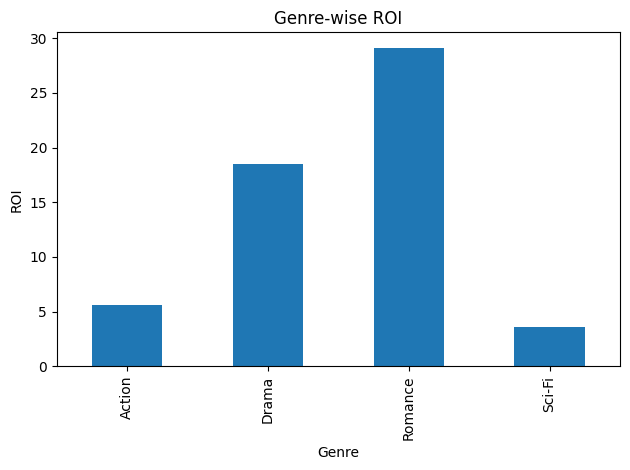

In [54]:
genre_roi = df.groupby("Genre")["ROI"].mean()
genre_roi.plot(kind="bar", title="Genre-wise ROI", ylabel="ROI", xlabel="Genre")
plt.tight_layout()
plt.show()